## Data Exploration

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Uploading Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from collections import Counter
from matplotlib import pyplot
from numpy import where

In [3]:
# Find the path to the dataset
import os
os.getcwd()

'/Users/tajania/code/AlcaRmsp/the_laundromat'

In [4]:
# create a csv path
csv_path = '/Users/tajania/code/AlcaRmsp/the_laundromat'
csv_path

'/Users/tajania/code/AlcaRmsp/the_laundromat'

In [5]:
# Uploading dataset into a dataframe 
df=pd.read_csv(os.path.join(csv_path, 'raw_data/data.csv'))
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Data Visualization

In [86]:
df_sample=df.sample(100000)

In [87]:
def prep_data(df_sample):
    X_viz = df_sample.iloc[:, 2:10].values
    y_viz = df_sample.isFraud.values
    return X_viz, y_viz

In [88]:
def plot_data(X_viz, y):
    plt.scatter(X_viz[y_viz == 0, 0], X_viz[y_viz == 0, 1], label="isFraud #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X_viz[y_viz == 1, 0], X_viz[y_viz == 1, 1], label="isFraud #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

In [89]:
# Create X and y from the prep_data function 
X_viz, y_viz = prep_data(df_sample)

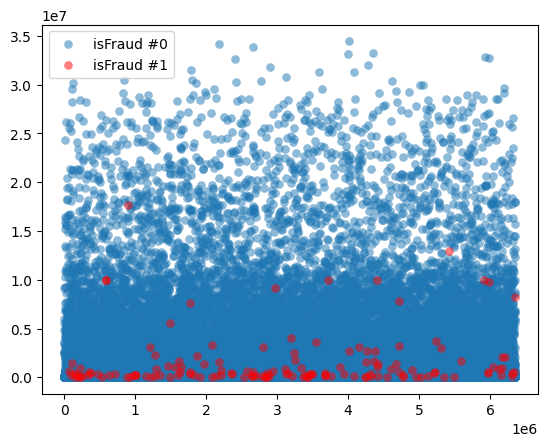

In [90]:
# Plot our data by running our plot data function on X and y
plot_data(X_viz, y_viz)

In [11]:
X_plt=df
y_plt=df.drop(df['isFraud'])

def plotStrip(X_plt, y_plt, hue, figsize = (14, 9)):
    
    fig = plt.figure(figsize = figsize)
    colours = plt.cm.tab10(np.linspace(0, 1, 9))
    with sns.axes_style('ticks'):
        ax = sns.stripplot(X_plt, y_plt, \
             hue = hue, jitter = 0.4, marker = '.', \
             size = 7, palette = colours)
        ax.set_xlabel('')
        ax.set_xticklabels(['genuine', 'fraudulent'], size = 16)
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)

        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles, ['Transfer', 'Cash in' , 'Cash out','Debit','Payment'], bbox_to_anchor=(1, 1), \
               loc=2, borderaxespad=0, fontsize = 16);
    return ax

/Users/tajania/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


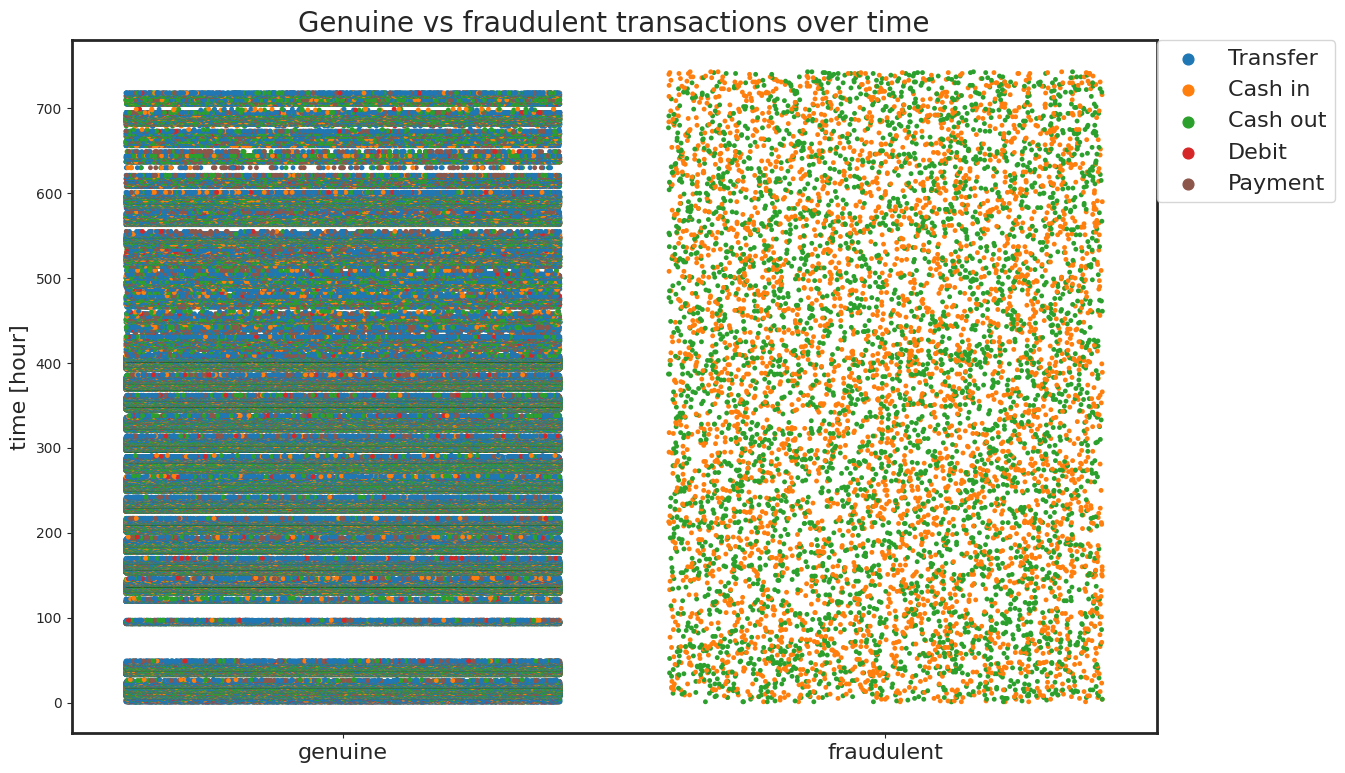

In [12]:
ax = plotStrip(df['isFraud'][:len(df)], df['step'][:len(df)],df['type'][:len(df)])
ax.set_ylabel('time [hour]', size = 16)
ax.set_title('Genuine vs fraudulent transactions over time', size = 20);

/Users/tajania/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


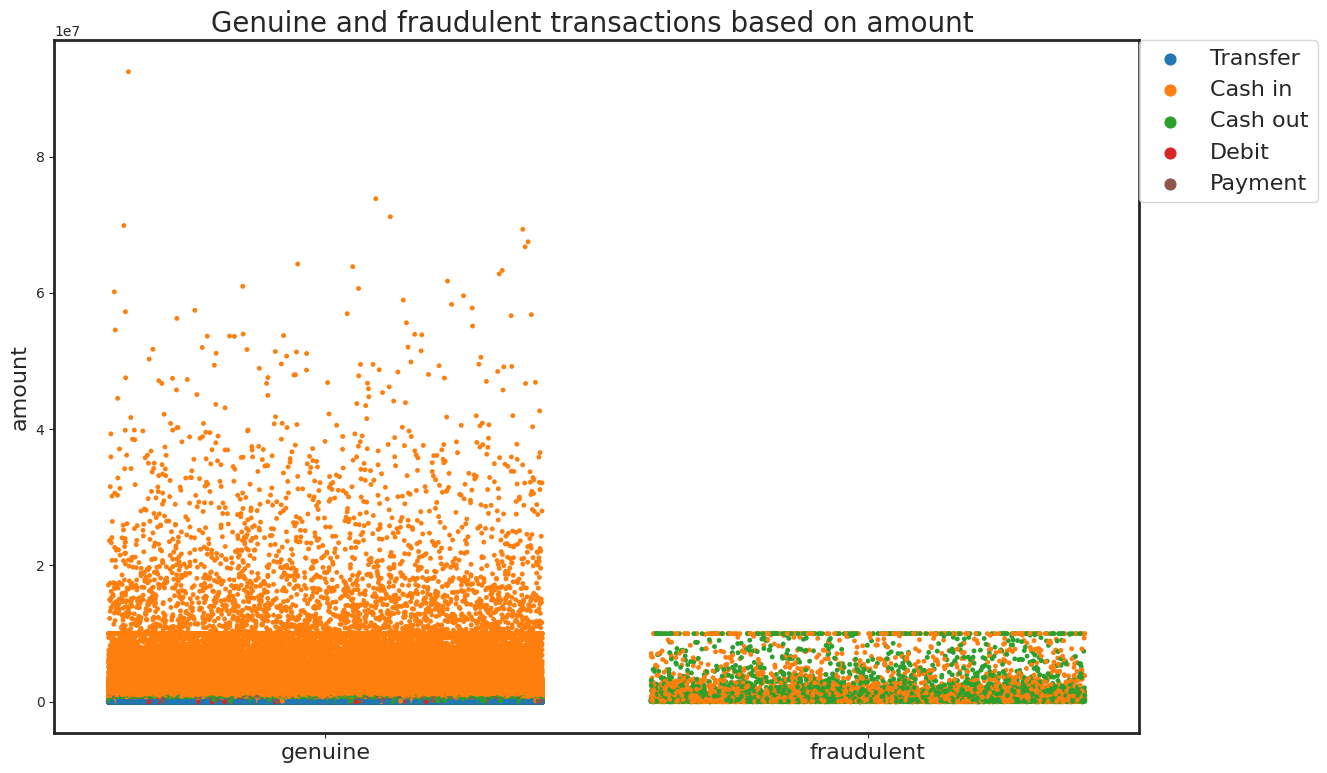

In [13]:
ax = plotStrip(df['isFraud'][:len(df)], df['amount'][:len(df)], df['type'][:len(df)])
ax.set_ylabel('amount', size = 16)
ax.set_title('Genuine and fraudulent transactions based on amount ', size = 20);

In [14]:
# change names of the columns to be uniform
df = df.rename(columns={'oldbalanceOrg':'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', \
                        'oldbalanceDest':'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})
df.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [15]:
df['type'].head

<bound method NDFrame.head of 0           PAYMENT
1           PAYMENT
2          TRANSFER
3          CASH_OUT
4           PAYMENT
             ...   
6362615    CASH_OUT
6362616    TRANSFER
6362617    CASH_OUT
6362618    TRANSFER
6362619    CASH_OUT
Name: type, Length: 6362620, dtype: object>

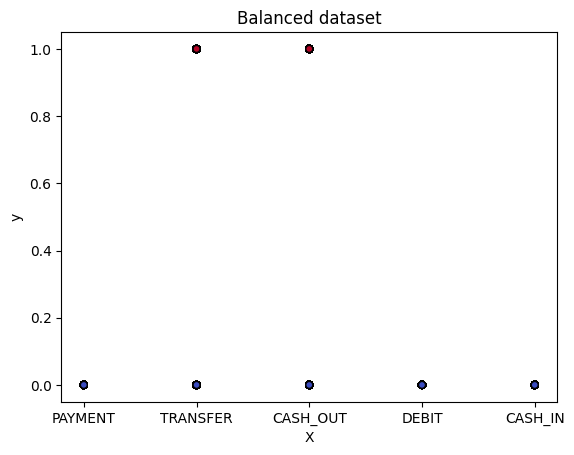

In [16]:
# visualise data before SMOTE
# scatter plot of examples by class label

import matplotlib.pyplot as plt
import pandas as pd

plt.title('Balanced dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(df['type'],df['isFraud'], marker='o', c=df['isFraud'],
           s=25, edgecolor='k', cmap=plt.cm.coolwarm)
plt.show()

In [17]:
# Get a description of the dataset
df.describe()

,step,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [18]:
# Correlation matrice
df.corr()

,step,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldBalanceOrig,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newBalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldBalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newBalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


,feature_1,feature_2,correlation
19,oldBalanceOrig,newBalanceOrig,0.998803
26,newBalanceOrig,oldBalanceOrig,0.998803
44,newBalanceDest,oldBalanceDest,0.976569
37,oldBalanceDest,newBalanceDest,0.976569
41,newBalanceDest,amount,0.459304


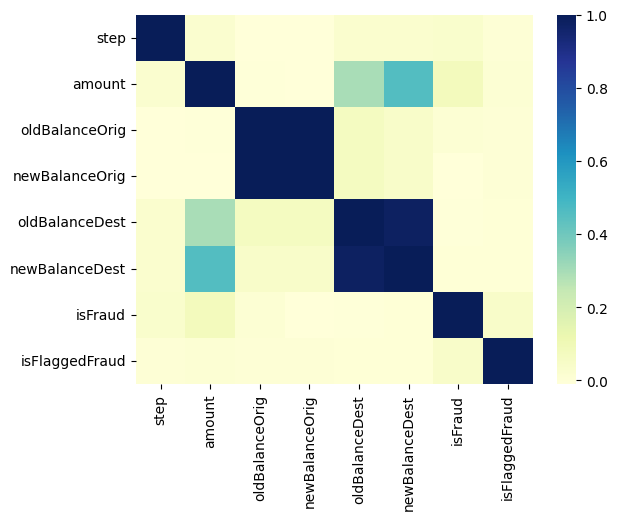

In [19]:
import seaborn as sns
# Heatmap
corr = df.corr()
sns.heatmap(corr,
xticklabels=corr.columns,
yticklabels=corr.columns,
cmap= 'YlGnBu')
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by='correlation',ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation
corr_df.head()

In [23]:
# Get the shape of dataset
df.shape

(6362620, 11)

In [24]:
# Get the type of dataset
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldBalanceOrig    float64
newBalanceOrig    float64
nameDest           object
oldBalanceDest    float64
newBalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [25]:
# check nil values in the dataset
df.isnull().values.any()

False

### Fraudulent transactions exploration

The dataset contains two columns called "isFraud" and "isFlaggedFraud". The column "isFlaggedFraud" traces fraudulent transactions following rule based  algorithm but are yet to be reviewed and investigated by an investogator. The column "isFraud" has been reviewd by the investigator

In [26]:
# Count the number and percentage of faudulent transaction in the dataset
number_fraud=(df.isFraud==1).value_counts()
percentage_fraud=number_fraud/len(df)
print(number_fraud)
print(percentage_fraud)

False    6354407
True        8213
Name: isFraud, dtype: int64
False    0.998709
True     0.001291
Name: isFraud, dtype: float64


Conclusion: 8213 transactions out of 6362620 are fraudulent 

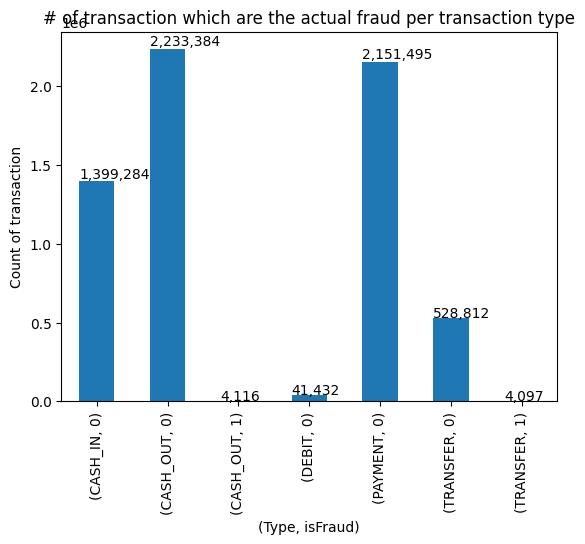

In [27]:
# Overview of transactions which are actual fraud per type of transaction
ax = df.groupby(['type', 'isFraud']).size().plot(kind='bar')
ax.set_title("# of transaction which are the actual fraud per transaction type")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

In [28]:
# Count the number of rows/data per type of operation
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [29]:
# Count number of fraudulent transaction when type is PAYMENT
df[df['type']=='PAYMENT'][df.isFraud==1].count()

/var/folders/pn/kmxsmqhd55x03nlqp2svkrxc0000gn/T/ipykernel_5013/1777184851.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['type']=='PAYMENT'][df.isFraud==1].count()


step              0
type              0
amount            0
nameOrig          0
oldBalanceOrig    0
newBalanceOrig    0
nameDest          0
oldBalanceDest    0
newBalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [30]:
# Count number of fraudulent transaction when type is TRANSFER
df[df['type']=='TRANSFER'][df.isFraud==1].count()

/var/folders/pn/kmxsmqhd55x03nlqp2svkrxc0000gn/T/ipykernel_5013/3345644087.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['type']=='TRANSFER'][df.isFraud==1].count()


step              4097
type              4097
amount            4097
nameOrig          4097
oldBalanceOrig    4097
newBalanceOrig    4097
nameDest          4097
oldBalanceDest    4097
newBalanceDest    4097
isFraud           4097
isFlaggedFraud    4097
dtype: int64

In [31]:
# Count number of fraudulent transaction when type is CASH_IN
df[df['type']=='CASH_IN'][df.isFraud==1].count()

/var/folders/pn/kmxsmqhd55x03nlqp2svkrxc0000gn/T/ipykernel_5013/2730498948.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['type']=='CASH_IN'][df.isFraud==1].count()


step              0
type              0
amount            0
nameOrig          0
oldBalanceOrig    0
newBalanceOrig    0
nameDest          0
oldBalanceDest    0
newBalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [32]:
# Count number of fraudulent transaction when type is CASH_OUT
df[df['type']=='CASH_OUT'][df.isFraud==1].count()

/var/folders/pn/kmxsmqhd55x03nlqp2svkrxc0000gn/T/ipykernel_5013/3994132455.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['type']=='CASH_OUT'][df.isFraud==1].count()


step              4116
type              4116
amount            4116
nameOrig          4116
oldBalanceOrig    4116
newBalanceOrig    4116
nameDest          4116
oldBalanceDest    4116
newBalanceDest    4116
isFraud           4116
isFlaggedFraud    4116
dtype: int64

In [33]:
# Count number of fraudulent transaction when type is DEBIT
df[df['type']=='DEBIT'][df.isFraud==1].count()

/var/folders/pn/kmxsmqhd55x03nlqp2svkrxc0000gn/T/ipykernel_5013/3257200122.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['type']=='DEBIT'][df.isFraud==1].count()


step              0
type              0
amount            0
nameOrig          0
oldBalanceOrig    0
newBalanceOrig    0
nameDest          0
oldBalanceDest    0
newBalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Conclusion: Fraudulent transactions happens during TRANSFER and CASH_OUT operations


### Flagged as fraud vs actual fraud

Check if the "isFlaggedFraud" is related to other columns or variables and try to explain the relationship if there is one.


See if all transactions that are flagged as fraud are actual fraud

In [34]:
# Now that we have the type of operations where fraud happens, the next step will be to check how 
# many operations have been flagged as fraudulent
dfFlagged = df[df['type']=='TRANSFER'][df.isFlaggedFraud==1]
dfFlagged

/var/folders/pn/kmxsmqhd55x03nlqp2svkrxc0000gn/T/ipykernel_5013/2636957570.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfFlagged = df[df['type']=='TRANSFER'][df.isFlaggedFraud==1]


,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [35]:
# Get the lenght of fraudulent transaction flagged
len(dfFlagged)

16

Only 16 operations out of 4097 fraudulant transactions have been flagged as fraud during the TRANSFER process


In [36]:
#check the rule based algorithm efficacy
df_NonFlagged = df[df['type']=='TRANSFER'][df.isFraud==1][df.isFlaggedFraud==0][df.amount>=200000]
len(df_NonFlagged)

/var/folders/pn/kmxsmqhd55x03nlqp2svkrxc0000gn/T/ipykernel_5013/1008645072.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_NonFlagged = df[df['type']=='TRANSFER'][df.isFraud==1][df.isFlaggedFraud==0][df.amount>=200000]


2724

In [37]:
dfFlagged.describe()

,step,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
count,16.000000,1.600000e+01,1.600000e+01,1.600000e+01,16.0,16.0,16.0,16.0
mean,537.562500,4.861598e+06,7.817869e+06,7.817869e+06,0.0,0.0,1.0,1.0
std,181.895196,3.572499e+06,6.972669e+06,6.972669e+06,0.0,0.0,0.0,0.0
min,212.000000,3.538742e+05,3.538742e+05,3.538742e+05,0.0,0.0,1.0,1.0
25%,415.500000,2.242749e+06,3.013980e+06,3.013980e+06,0.0,0.0,1.0,1.0
50%,601.500000,4.234245e+06,4.923043e+06,4.923043e+06,0.0,0.0,1.0,1.0
75%,678.750000,7.883451e+06,1.212835e+07,1.212835e+07,0.0,0.0,1.0,1.0
max,741.000000,1.000000e+07,1.958504e+07,1.958504e+07,0.0,0.0,1.0,1.0


In [38]:
df_NonFlagged.describe()

,step,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
count,2724.000000,2.724000e+03,2.724000e+03,2.724000e+03,2.724000e+03,2.724000e+03,2724.0,2724.0
mean,372.626285,2.158057e+06,2.690409e+06,5.340441e+05,1.417665e+03,4.827205e+03,1.0,0.0
std,213.470604,2.683049e+06,5.141330e+06,3.294223e+06,4.791985e+04,9.115328e+04,0.0,0.0
min,1.000000,2.000083e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0
25%,186.000000,4.421909e+05,4.414400e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0
50%,375.000000,9.867501e+05,9.829158e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0
75%,558.000000,2.521304e+06,2.521304e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0
max,743.000000,1.000000e+07,5.958504e+07,4.958504e+07,2.122337e+06,3.217684e+06,1.0,0.0


Checking the rule based system, we believe that there are other rules, not just the min threshold of 200,000, used to flag potential fraudulent transactions

The flagging Fraud column is a very poor indication of the actual fraud given that the "isFlaggedFraud" column only picked 16 transactions when in reality we have over 8000 fraudulent transactions

In [39]:
# Drop isFlaggedFraud column
df=df.drop(['isFlaggedFraud'], axis=1)
df

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


### Account balance analysis

In [40]:
# check relationship between amount, isFraud, oldBalanceDest and newBalanceDest

df_fraudBalanceDest = df[(df['isFraud'] == 1) & 
                         (df['oldBalanceDest'] == df['newBalanceDest']) & 
                         (df['amount'] != 0)]
print(len(df_fraudBalanceDest)/len(df[df['isFraud']==1]))
print(len(df_fraudBalanceDest)/len(df[df['isFraud']==0]))

0.4955558261293072
0.000640500364550146


This shows that 49.5% of the fraudulent transactions have the characteristics of old balance of destination account and new balance of the same account equal while the amount is different than zero vs 0.6% for non fraudulent transactions

The same conclusion for the origination account 

In [41]:
df_fraudBalanceOrig = df[(df['isFraud'] == 1) & 
                         (df['oldBalanceOrig'] == df['newBalanceOrig']) & 
                         (df['amount'] != 0)]
print(len(df_fraudBalanceOrig)/len(df[df['isFraud']==1]))
print(len(df_fraudBalanceOrig)/len(df[df['isFraud']==0]))

0.00499208571776452
6.452214974583781e-06


In [42]:
# Differentiating the fraudulent account that meets the condition above with non fraudulent accounts that have new and old balance either equal or nil
df.loc[(df.oldBalanceDest == 0) & (df.newBalanceDest == 0) & (df.amount != 0), \
      ['oldBalanceDest', 'newBalanceDest']] = - 1
df

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,-1.00,-1.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,-1.00,-1.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,-1.00,-1.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,-1.00,-1.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,-1.00,-1.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,-1.00,-1.00,1


In [43]:
# Add a new feature to account for the error in the balance for both origination and destination accounts
df['errorBalanceOrig']=df['newBalanceOrig'] + df['amount'] - df['oldBalanceOrig']
df['errorBalanceDest']=df['newBalanceDest'] + df['amount'] - df['oldBalanceDest']
df

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,errorBalanceOrig,errorBalanceDest
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,-1.00,-1.00,0,0.0,9839.64
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,-1.00,-1.00,0,0.0,1864.28
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,-1.00,-1.00,1,0.0,181.00
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0.0,-21001.00
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,-1.00,-1.00,0,0.0,11668.14
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0.0,679364.26
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,-1.00,-1.00,1,0.0,6311409.28
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0.0,12622818.55
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,-1.00,-1.00,1,0.0,850002.52


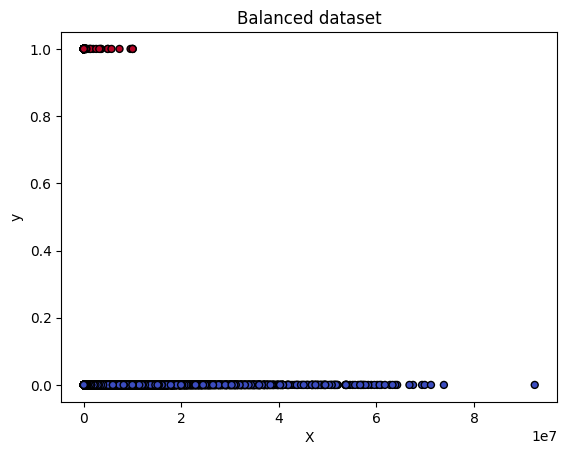

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_classification
from imblearn.datasets import make_imbalance

plt.title('Balanced dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(df['errorBalanceOrig'],df['isFraud'], marker='o', c=df['isFraud'],
           s=25, edgecolor='k', cmap=plt.cm.coolwarm)
plt.show()

In [45]:
from sklearn.preprocessing import LabelEncoder
# create a label encoder object
le = LabelEncoder()

# apply the label encoder to non-numeric columns
df['nameOrig'] = le.fit_transform(df['nameOrig'])
df['nameDest'] = le.fit_transform(df['nameDest'])
df.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,errorBalanceOrig,errorBalanceDest
0,1,PAYMENT,9839.64,757869,170136.0,160296.36,1662094,-1.0,-1.0,0,0.0,9839.64
1,1,PAYMENT,1864.28,2188998,21249.0,19384.72,1733924,-1.0,-1.0,0,0.0,1864.28
2,1,TRANSFER,181.00,1002156,181.0,0.00,439685,-1.0,-1.0,1,0.0,181.00
3,1,CASH_OUT,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0.0,-21001.00
4,1,PAYMENT,11668.14,3445981,41554.0,29885.86,828919,-1.0,-1.0,0,0.0,11668.14


In [46]:
#Proportion of fraudulent transaction where errorBalance of destination account is higher than 0
print(len(df[(df['isFraud'] == 1) & 
                         (df['errorBalanceDest']>0)])/len(df[df['isFraud']==1]))

#Proportion of non fraudulent transaction where errorBalance of destination account is higher than 0
print(len(df[(df['isFraud'] == 0) & 
                         (df['errorBalanceDest']>0)])/len(df[df['isFraud']==0]))

0.9965907707293316
0.8627591842952458


Most of the transactions where errorbalanceDest > 0 has high chance of being fraud
Valid transactions are most likely to have errorbalanceOrig > 0

## Recursive Feature Elimination (RFE) for Feature Selection

### Feature Scaling

In [47]:
from sklearn.preprocessing import OneHotEncoder

# Check unique values for streets (2)
print(f"The unique values for 'type' are {df.type.unique()}")

# Instantiate the OneHotEncoder
ohe_binary = OneHotEncoder(sparse = False, drop="if_binary") 

# Fit encoder
ohe_binary.fit(df[['type']]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe_binary.categories_}")

The unique values for 'type' are ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
The categories detected by the OneHotEncoder are [array(['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'],
      dtype=object)]


In [48]:
# Display the generated names
print(f"The column names for the encoded values are {ohe_binary.get_feature_names_out()}")

# Transform the current "Street" column
df[ohe_binary.get_feature_names_out()] = ohe_binary.transform(df[['type']])

# Drop the column "Street" which has been encoded
df.drop(columns = ["type"], inplace = True)

# Show the dataset
df.head(3)

The column names for the encoded values are ['type_CASH_IN' 'type_CASH_OUT' 'type_DEBIT' 'type_PAYMENT'
 'type_TRANSFER']


,step,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,errorBalanceOrig,errorBalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,757869,170136.0,160296.36,1662094,-1.0,-1.0,0,0.0,9839.64,0.0,0.0,0.0,1.0,0.0
1,1,1864.28,2188998,21249.0,19384.72,1733924,-1.0,-1.0,0,0.0,1864.28,0.0,0.0,0.0,1.0,0.0
2,1,181.00,1002156,181.0,0.00,439685,-1.0,-1.0,1,0.0,181.00,0.0,0.0,0.0,0.0,1.0


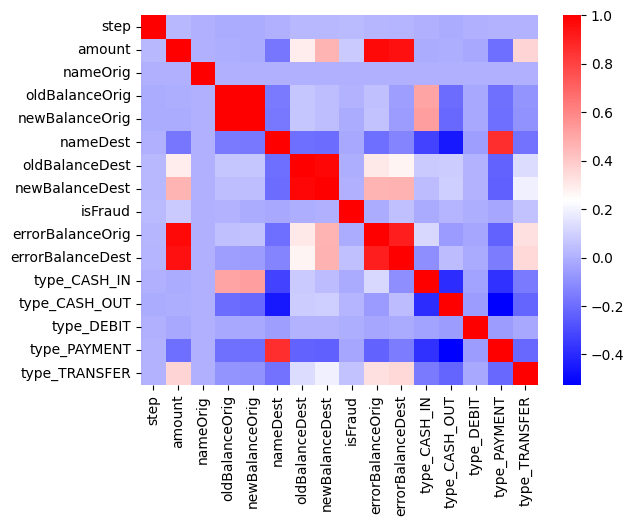

In [49]:
# Heatmap of pairwise correlations
correlation_matrix = df.corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");

In [ ]:
# pearson's correlation feature selection for numeric input and numeric output
#from sklearn.datasets import make_regression
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import f_regression
# generate dataset
#X=df_new.drop(['isFraud'], axis=1)
#y = df_new['isFraud']
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define feature selection
#fs = SelectKBest(score_func=f_regression, k='all')
# apply feature selection
#X_selected = fs.fit_transform(X, y)
#print(X_selected.shape)

In [ ]:
# explore the number of selected features for RFE
#from numpy import mean
#from numpy import std
#from sklearn.datasets import make_classification
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.feature_selection import RFE
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.pipeline import Pipeline
#from matplotlib import pyplot
 
# get a list of models to evaluate
#def get_models():
    #models = dict()
    #for i in range(1, 4):
     #   rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        #model = DecisionTreeClassifier()
        #models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    #return models
#get_models()

In [ ]:
# evaluate a give model using cross-validation


In [ ]:
# evaluate the models and store results
#results, names = list(), list()
#for name, model in models.items():
    #scores = evaluate_model(model, X, y)
    #results.append(scores)
    #names.append(name)
#print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

In [ ]:
# plot model performance for comparison
#pyplot.boxplot(results, labels=names, showmeans=True)
#pyplot.show()

In [ ]:
# summarize all features
# define RFE
#rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)
# fit RFE
#rfe.fit(X, y)
#for i in range(X.shape[1]):
    #print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

## Train Test Dataset

In [50]:
# Define X and y
X=df.drop(['isFraud'], axis=1)
y = df['isFraud']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Balance the y test using the SMOTE

In [52]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC

X_test_resampled, y_test_resampled = SMOTE(sampling_strategy=0.5).fit_resample(X_test, y_test)

In [53]:
y_test.shape

(1272524,)

In [54]:
y_test_resampled.shape

(1906356,)

## Balance the train Dataset using the SMOTE

❗️ Warning about the oversampling method ❗️
Train-test split your dataset before oversampling
Oversample only in the train set
→
The model needs to learn about the minority class.
Evaluate in the test set without oversampling
→
We want the model to be evaluated in real conditions

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model

Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space

([<matplotlib.patches.Wedge at 0x31234ef20>,
 [Text(-1.099990955625572, 0.004460666087110192, 'Not Fraud'),
  Text(1.0999909559371663, -0.004460589247970448, 'Fraud')])

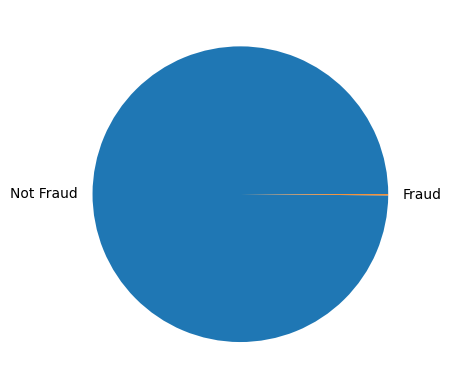

In [55]:
#Check if data is balanced before SMOTE
import matplotlib.pyplot as plt
labels = 'Not Fraud','Fraud'
values=df['isFraud'].value_counts()
fig, ax = plt.subplots()
ax.pie(values, labels=labels)

In [56]:
import imblearn
print(imblearn.__version__)

0.10.1


In [57]:
X=df.drop(['isFraud'], axis=1)
y = df['isFraud']

In [58]:
# summarize class distribution
import collections
counter = collections.Counter(y)
print(counter)

Counter({0: 6354407, 1: 8213})


In [59]:
X_train.shape

(5090096, 15)

In [60]:
y_train.shape

(5090096,)

In [61]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC

X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)


In [ ]:
X_resampled.head()

In [ ]:
X_resampled.shape

In [ ]:
y_resampled.shape

In [62]:
pd.DataFrame(y_resampled)

,isFraud
0,0
1,0
2,0
3,0
4,0
...,...
10167001,1
10167002,1
10167003,1
10167004,1


In [63]:
X_resampled['isFraud'] = y_resampled

In [64]:
X_resampled

,step,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,errorBalanceOrig,errorBalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud
0,619,3.863851e+05,4449199,4.669569e+06,5055953.92,289167,5.060351e+05,1.196500e+05,772770.15,0.000000e+00,1.0,0.0,0.0,0.0,0.0,0
1,164,2.124588e+05,5813773,2.346350e+05,447093.78,204382,8.060379e+05,5.935791e+05,424917.56,0.000000e+00,1.0,0.0,0.0,0.0,0.0,0
2,382,1.996760e+04,5870502,3.634000e+03,0.00,1346491,-1.000000e+00,-1.000000e+00,16333.60,1.996760e+04,0.0,0.0,0.0,1.0,0.0,0
3,180,5.276165e+05,5095916,1.802160e+05,0.00,446948,9.215710e+04,6.197736e+05,347400.51,1.055233e+06,0.0,1.0,0.0,0.0,0.0,0
4,36,2.060679e+05,5557736,0.000000e+00,0.00,338417,2.131494e+06,2.337562e+06,206067.85,4.121357e+05,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10167001,351,5.942054e+04,687591,5.942054e+04,0.00,338434,1.794241e+05,2.388447e+05,0.00,1.188411e+05,0.0,1.0,0.0,0.0,0.0,1
10167002,268,1.990692e+06,2051680,1.990692e+06,0.00,426028,4.125709e+05,2.403262e+06,0.00,3.981383e+06,0.0,1.0,0.0,0.0,0.0,1
10167003,393,1.576864e+05,3175984,1.576864e+05,0.00,104406,-1.000000e+00,-1.000000e+00,0.00,1.576864e+05,0.0,0.0,0.0,0.0,1.0,1
10167004,637,5.101969e+06,3729878,5.101969e+06,0.00,504877,1.456671e+05,5.247637e+06,0.00,1.020394e+07,0.0,1.0,0.0,0.0,0.0,1


([<matplotlib.patches.Wedge at 0x3123be5c0>,
 [Text(6.735557395310444e-17, 1.1, 'Not Fraud'),
  Text(-2.0206672185931328e-16, -1.1, 'Fraud')])

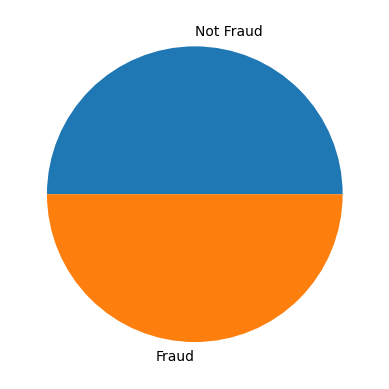

In [65]:
#Check if data is balanced after SMOTE balancing
import matplotlib.pyplot as plt
labels = 'Not Fraud','Fraud'
values=X_resampled['isFraud'].value_counts()
fig, ax = plt.subplots()
ax.pie(values, labels=labels)

In [66]:
X_resampled.head()

,step,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,errorBalanceOrig,errorBalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud
0,619,386385.08,4449199,4669568.85,5055953.92,289167,506035.06,119649.98,772770.15,0.00,1.0,0.0,0.0,0.0,0.0,0
1,164,212458.78,5813773,234635.00,447093.78,204382,806037.88,593579.10,424917.56,0.00,1.0,0.0,0.0,0.0,0.0,0
2,382,19967.60,5870502,3634.00,0.00,1346491,-1.00,-1.00,16333.60,19967.60,0.0,0.0,0.0,1.0,0.0,0
3,180,527616.51,5095916,180216.00,0.00,446948,92157.10,619773.61,347400.51,1055233.02,0.0,1.0,0.0,0.0,0.0,0
4,36,206067.85,5557736,0.00,0.00,338417,2131494.48,2337562.32,206067.85,412135.69,0.0,0.0,0.0,0.0,1.0,0


In [77]:
X_postsmote_sample=X_resampled.sample(100000)
X_postsmote_viz=X_postsmote_sample.iloc[:, 2:10].values
y_postsmote_viz=X_postsmote_sample.isFraud.values

In [78]:
y_postsmote_viz.shape

(100000,)

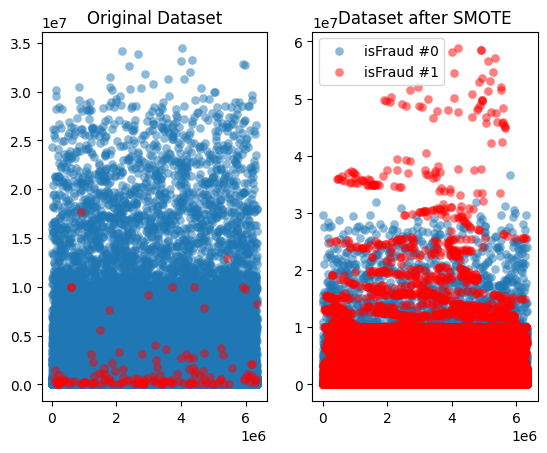

In [92]:
# Plot the resampled data
import matplotlib.pyplot as plt
def compare_plot(X_viz, y_viz, X_postsmote_viz, y_postsmote_viz, method):
    plt.subplot(1, 2, 1)
    plt.scatter(X_viz[y_viz == 0, 0], X_viz[y_viz == 0, 1], label="isFraud #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X_viz[y_viz == 1,0], X_viz[y_viz == 1,1], label="isFraud#1", alpha=0.5, linewidth=0.15, c='r')
    plt.title('Original Dataset')
    plt.subplot(1, 2, 2)
    plt.scatter(X_postsmote_viz[y_postsmote_viz== 0, 0], X_postsmote_viz[y_postsmote_viz == 0, 1], label="isFraud #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X_postsmote_viz[y_postsmote_viz == 1, 0], X_postsmote_viz[y_postsmote_viz == 1, 1], label="isFraud #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title('Dataset after SMOTE')
    plt.legend()
    plt.show()

compare_plot(X_viz, y_viz, X_postsmote_viz, y_postsmote_viz, method='SMOTE')

In [ ]:
print (X_beforesmote.shape)
print (y_beforesmote.shape)
print (X_resampled.shape)
print (y_resampled.shape)

In [ ]:
df.info()

In [ ]:
from imblearn.over_sampling import ADASYN
X_resampled_ADASYN, y_resampled_ADASYN = ADASYN().fit_resample(X_train, y_train)

In [ ]:
X_resampled_ADASYN['isFraud'] = y_resampled_ADASYN

In [ ]:
#Check if data is balanced after ADASYN balancing
import matplotlib.pyplot as plt
labels = 'Not Fraud','Fraud'
values=X_resampled_ADASYN['isFraud'].value_counts()
fig, ax = plt.subplots()
ax.pie(values, labels=labels)

In [ ]:
X_resampled.head()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.title('Balanced dataset')
plt.xlabel('X_resampled')
plt.ylabel('y')
plt.scatter(df['amount'],df['isFraud'], marker='o', c=df['isFraud'],
           s=25, edgecolor='k', cmap=plt.cm.coolwarm)
plt.show()

## XGBClassifier

In [ ]:
df_fraud=X_resampled[X_resampled.isFraud==1].iloc[:100000]
df_fraud.sample(100000)

In [ ]:
df_nonfraud=X_resampled[X_resampled.isFraud==0].iloc[:100000]
df_nonfraud.sample(100000)

In [ ]:
df_sample=pd.concat([df_fraud,df_nonfraud], axis=0)
df_sample.shape

In [ ]:
import seaborn as sns
# Heatmap
corr = df_sample.corr()
sns.heatmap(corr,
xticklabels=corr.columns,
yticklabels=corr.columns,
cmap= 'YlGnBu')
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by='correlation',ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation
corr_df.head()

In [ ]:
X_train_modeling=df_sample.drop('isFraud',axis=1)
y_train_modeling=df_sample['isFraud']

In [ ]:
# Baseline Model
# Extreme Gradient Boosting algorithm
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier()
model.fit(X_train_modeling, y_train_modeling)

In [ ]:
X_test.head()

In [ ]:
y_test.shape

In [ ]:
X_train_modeling.shape

In [ ]:
y_test_resampled.value_counts()/len(y_test_resampled)

In [ ]:
y_test_resampled.shape

In [ ]:
X_test_resampled.shape

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test_resampled)
baseline_predictions = [round(value) for value in y_pred]

# Compute MAE
mae_baseline = mean_absolute_error(y_test_resampled, baseline_predictions)
# Compute accuracy
accuracy = accuracy_score(y_test_resampled, baseline_predictions)
recall = recall_score(y_test_resampled, y_pred)
print('Classification report:\n', classification_report(y_test_resampled, y_pred)
print("Recall:", recall)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("mae_baseline: %.2f%%" % (mae_baseline * 100.0))

In [ ]:
print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}".format(model.score(X_test, y_test)))

### XGBClassifier with 2 features

In [ ]:
X_train_2features=df_sample.drop(['errorBalanceOrig','errorBalanceDest','isFraud'], axis=1)
y_train_2features=df_sample['isFraud']

In [ ]:
X_test_2features=X_test_resampled.drop(['errorBalanceOrig','errorBalanceDest'],axis=1)
y_test_2features=y_test_resampled

In [ ]:
X_train_2features.shape

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb= XGBClassifier()
xgb.fit(X_train_2features, y_train_2features)

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import mean_absolute_error

y_pred_2 = xgb.predict(X_test_2features)
baseline_predictions = [round(value) for value in y_pred_2]

# Compute MAE
mae_baseline = mean_absolute_error(y_test_2features, baseline_predictions)
# Compute accuracy
accuracy = accuracy_score(y_test_2features, baseline_predictions)
recall = recall_score(y_test_2features, y_pred_2)

print("Recall:", recall)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("mae_baseline: %.2f%%" % (mae_baseline * 100.0))

### Confusion metrics

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_pred,y_test_2features)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

In [ ]:
confusion_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
fig, ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap = 'PuBu', ax = ax)

In [ ]:
limit = len(y_pred)
ax = plotStrip(Y[:limit], X.amount[:limit], X.type[:limit], figsize = (14, 9))
ax.set_ylabel('amount', size = 16)
ax.set_title('Same-signed fingerprints of genuine \
and fraudulent transactions over amount', size = 18);

In [ ]:
# Grid search
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score


# Instantiate model
model_1 = ElasticNet()

# Hyperparameter Grid
grid = {
    'alpha': [0.01, 0.1, 1], 
    'l1_ratio': [0.2, 0.5, 0.8]
}

# Instantiate Grid Search
search = GridSearchCV(
    model_1,
    grid, 
    scoring = 'r2',
    cv = 5,
    n_jobs=-1 # parallelize computation
) 

# Fit data to Grid Search
search.fit(X_train_modeling.iloc[:10], y_train_modeling.iloc[:10])

In [ ]:
# Best score
search.best_score_

# Best Params
search.best_params_

# Best estimator
search.best_estimator_

## Decision Classifier

In [ ]:
# Instantiate and train model
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=2)
tree_clf.fit(X_train_modeling, y_train_modeling)

In [ ]:
from sklearn.metrics import recall_score

y_pred = tree_clf.predict(X_test_resampled)
baseline_predictions = [round(value) for value in y_pred]

# Compute accuracy
accuracy = accuracy_score(y_test_resampled, baseline_predictions)
recall_2 = recall_score(y_test_resampled, y_test)
print('Classification report:\n', classification_report(y_test_resampled, y_pred)
print("Recall:", recall_2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
#from sklearn.svm import SVC
#svc = SVC(kernel='linear', C=10)

# equivalent but with SGD solver
#from sklearn.linear_model import SGDClassifier
#svc_bis = SGDClassifier(loss='hinge', penalty='l2', alpha=1/10)

In [ ]:
#model selection?
#Recall?
#List of classification models/how to do model tuning to the models (hyperparameter to look at)/
#XGBoost
#each model => feature importance/permutation=>model tuning (can be before feature importance, grid search, random search)=>feature importance

## Gridsearch

In [ ]:
X_train_modeling.shape

In [ ]:
y_train_modeling.shape

In [ ]:
cv_params = {'max_depth': [1,2,3,4,5,6], 'min_child_weight': [1,2,3,4]}    # parameters to be tries in the grid search
fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic'}   #other parameters, fixed for the moment 
csv = GridSearchCV(XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 2)

In [ ]:
csv.fit(X_train_modeling, y_train_modeling)

In [ ]:
csv.best_params_

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [ ]:
print(X_train_modeling.shape)
print(y_train_modeling.shape)

In [ ]:
X_train_modeling.head()

In [ ]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import KFold
#import numpy.random as rnd
#param_grid = {
    #'n_estimators': [100],
    #'criterion': ['entropy', 'gini'],
    #'bootstrap': [True, False],
    #'max_depth': [6],
    #'max_features': ['errorBalanceOrig', 'errorBalanceDest'],
    #'min_samples_leaf': [2, 3, 5],
    #'min_samples_split': [2, 3, 5]
#}
#cv = KFold(n_splits=2, shuffle=True, random_state=rnd)
#scoring_metric='recall'

#rfc_clf = GridSearchCV(estimator=rfc,
                      #param_grid=param_grid,
                      #scoring=scoring_metric,
                      #cv=cv,
                      #verbose=False,
                      #n_jobs=-1)

#best_rfc_clf = rfc_clf.fit(X_train_modeling, y_train_modeling)

#y_pred = cross_val_predict(best_rfc_clf.best_estimator_,X_train_modeling, y_train_modeling,cv=cv)
#print('Train: ', np.round(recall_score(y_train_modeling, y_pred), 3))

#y_pred = best_rf_clf.best_estimator_.fit(X_train_modeling, y_train_modeling).predict(X_test_resampled)
#print(' Test: ', np.round(recall_score(y_test_resampled, y_pred), 3))

In [ ]:
#Train the model on the Training Data = X_resampled and y_resampled
rfc.fit(X_train_modeling, y_train_modeling)

In [ ]:
y_pred = rfc.predict(X_test_resampled)

In [ ]:
# Score the model on the Test data
from sklearn.metrics import recall_score
recall50 = recall_score(y_test_resampled, y_pred)
print("Recall:", recall50)